In [1]:
import pandas as pd

# CSV ファイルを読み込む
df = pd.read_csv("dummy_parking_data_with_weather.csv")

# 日時データを datetime 型に変換
df['date_time'] = pd.to_datetime(df['date_time'])

# Prophet のフォーマットに変更
df_prophet = df.rename(columns={'date_time': 'ds', 'usage': 'y'})[['ds', 'y']]

# データの確認
print(df_prophet.head())


                   ds   y
0 2025-01-01 00:00:00  29
1 2025-01-01 01:00:00  21
2 2025-01-01 02:00:00  17
3 2025-01-01 03:00:00  14
4 2025-01-01 04:00:00  33


In [2]:
from prophet import Prophet

# Prophet モデルのインスタンスを作成
model = Prophet()

# モデルの学習（データをフィット）
model.fit(df_prophet)

print("モデルの学習が完了しました！")

c:\Users\higtr\anaconda3\envs\stan_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
18:12:42 - cmdstanpy - INFO - Chain [1] start processing
18:12:43 - cmdstanpy - INFO - Chain [1] done processing


モデルの学習が完了しました！


In [4]:
# 未来の予測期間を設定（例: 30日間、1時間ごと）
future = model.make_future_dataframe(periods=30 * 24, freq='h')

# 未来データの確認
print(future.tail())

                      ds
1459 2025-03-02 19:00:00
1460 2025-03-02 20:00:00
1461 2025-03-02 21:00:00
1462 2025-03-02 22:00:00
1463 2025-03-02 23:00:00


In [ ]:
# 予測の実行
forecast = model.predict(future)

# 予測結果の確認
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [5]:
# 予測の実行
forecast = model.predict(future)

# 予測結果の確認
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1459,2025-03-02 19:00:00,53.752708,29.855684,78.423559
1460,2025-03-02 20:00:00,35.037155,12.173429,59.810078
1461,2025-03-02 21:00:00,15.585074,-10.263575,37.840456
1462,2025-03-02 22:00:00,6.394449,-16.985308,31.042077
1463,2025-03-02 23:00:00,10.724032,-13.475645,35.107221


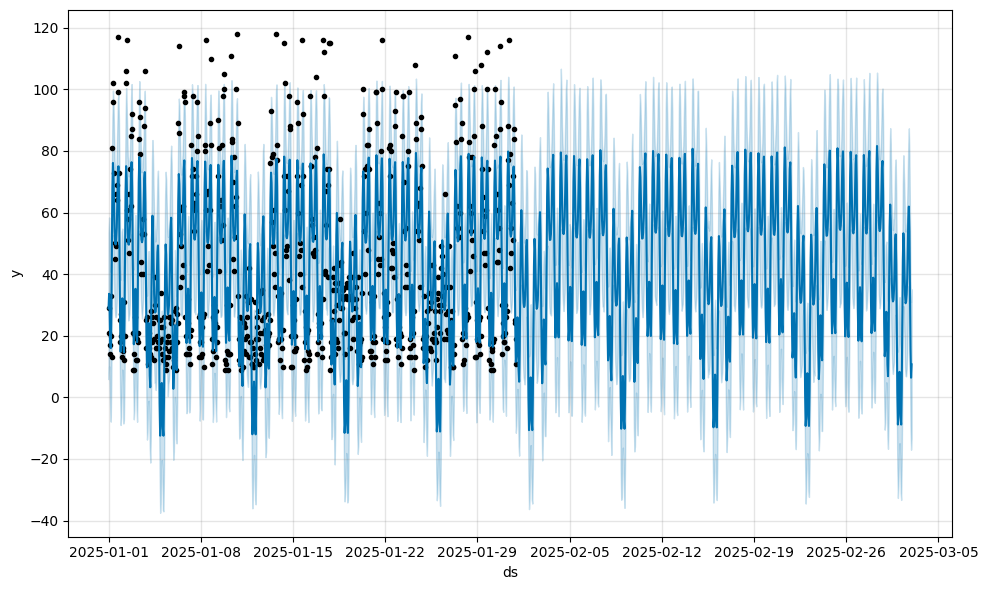

In [6]:
import matplotlib.pyplot as plt

# 予測結果のプロット
fig = model.plot(forecast)
plt.show()